### Single Nucleus

#### HTAPP-895-SMP-7359

In [2]:
libraries <- c("ggplot2", "Seurat", "glue", "dplyr", "anndata", 
               "data.table", "Matrix", "mltools", "enrichR", "R.utils")
lapply(libraries, function(x) suppressMessages(require(x, character.only = TRUE,quietly=TRUE,warn.conflicts = FALSE)))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

In [3]:
sample <- "HTAPP-895-SMP-7359"

In [4]:
# Assumes you're working in the repository root directory
source("code/utils.R")

In [6]:
sn_adata <- read_h5ad(paste0("path/to/data/", sample, "_scRNAseq_processed.h5ad"))

In [7]:
# Reformat counts

In [8]:
counts <- get_adata_counts(sn_adata)
colnames(counts) <- sub(glue('^{sample}-TST-channel1_'), '', colnames(counts))

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.9 GiB"


In [9]:
head(counts)

,AACCAACGTAATGCTC-1,GATCAGTTCTTACCGC-1,TGGTACAGTATGCTTG-1,CATGCTCCACGACCTG-1,CACGAATAGGTAATCA-1,TATGTTCTCACCTCAC-1,TAAGCCATCCTAGCCT-1,GGAAGTGTCGCTAAAC-1,CTGCCTACAGTAACAA-1,ATGAGGGCACACGTGC-1,⋯,HTAPP-895-SMP-7359-TST-channel2_TGGTAGTGTTCCTTGC-1,HTAPP-895-SMP-7359-TST-channel2_CGATCGGAGTATGGAT-1,HTAPP-895-SMP-7359-TST-channel2_GTTGTCCGTGGAATGC-1,HTAPP-895-SMP-7359-TST-channel2_ACTATTCAGCGCTGCT-1,HTAPP-895-SMP-7359-TST-channel2_TACCCACGTTCTTCAT-1,HTAPP-895-SMP-7359-TST-channel2_AGCGCCACAAACACCT-1,HTAPP-895-SMP-7359-TST-channel2_TTCACCGCAGCCGTTG-1,HTAPP-895-SMP-7359-TST-channel2_GACACGCCATCTCATT-1,HTAPP-895-SMP-7359-TST-channel2_ACGTACATCTGTTCAT-1,HTAPP-895-SMP-7359-TST-channel2_GTTATGGCAGTATGAA-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AC114498.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AL669831.5,2,1,2,1,1,2,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
counts_mat <- counts %>% as.data.table() %>% sparsify()
counts_mat <- counts_mat[,colSums(counts_mat)>300] # filter for cells with over 300 counts across all genes
row.names(counts_mat) <- row.names(counts)

In [12]:
counts_mat[1:5,1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
            AACCAACGTAATGCTC-1 GATCAGTTCTTACCGC-1 TGGTACAGTATGCTTG-1
MIR1302-2HG                  .                  .                  .
AL627309.1                   .                  .                  .
AC114498.1                   .                  .                  .
AL669831.5                   2                  1                  2
FAM87B                       .                  .                  .
            CATGCTCCACGACCTG-1 CACGAATAGGTAATCA-1
MIR1302-2HG                  .                  .
AL627309.1                   .                  .
AC114498.1                   .                  .
AL669831.5                   1                  1
FAM87B                       .                  .

In [13]:
# Reformat beads metadata
beads_df <- sn_adata$obs
row.names(beads_df) <- sub(glue('^{sample}-TST-channel1_'), '', row.names(beads_df))
beads_df$bc <- row.names(beads_df)

#### Create a Seurat Object from single-cell/single-nucleus data

In [14]:
sn=make_seurat_annot(counts_mat, beads_df)

Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  COL4A2, COL4A1, IGFBP7, LAMA4, CALD1, SPARC, LDB2, NRP1, FN1, MSRB3 
	   CACNA1C, ADGRF5, NXN, NOX4, RBMS3, ERG, LAMB1, KALRN, ADGRL2, GLIS3 
	   DCLK2, TIMP3, UACA, CHSY3, COL15A1, NID1, PTPRE, ADAMTS9-AS2, ZNF521, HMCN1 
Negative:  KRT19, ADCY1, TFF1, RPLP0, ESRP1, IGFBP4, COX6C, TFF3, ADIRF, CHPT1 
	   LINC00536, TMBIM6, MAL2, RPLP1, AC013652.1, SHANK2, ZNF552, CA8, PPM1E, PLEKHA7 
	   MGP, DSP, AGBL4, SLC9A3R1, SET, RPS2, MPPED2, S100A6, HIST1H2AC, LDHA 
PC_ 2 
Positive:  MSR1, TFEC, GPNMB, FPR3, NPL, DOCK8, SLCO2B1, MARCH1, AC074327.1, COLEC12 
	   FMNL2, SLC1A3, PIK3AP1, ABCA1, ST18, ALOX5, ABR, SYK, APBB1IP, IL18 
	   CHST11, TMEM51, RASSF4, ITGAX, SIGLEC1, DAPK1, DOCK2, SLC11A1, SLC8A1, KCNE1 
Negative:  PTPRG, TEAD1, FBXL7, CALD1, COL4A2, PARD3, ANTXR1, DLC1, PRKG1, PARVA 
	   COL4A1, MSRB3, CACNA1C, SOX5, IGFBP7, IGFBP4, TIMP3, PALLD, PDZRN3, NXN 
	   NOX4, ZFPM2, LAMB1, PLOD2, COL3A

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9958
Number of edges: 306834

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8661
Number of communities: 16
Elapsed time: 1 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
03:23:00 UMAP embedding parameters a = 0.9922 b = 1.112

03:23:00 Read 9958 rows and found 10 numeric columns

03:23:00 Using Annoy for neighbor search, n_neighbors = 30

03:23:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:23:02 Writing NN index file to temp file /local/scratch/39682465.1.interactive/RtmpuhMpGl/file370581de44b3a

03:23:02 Searching Annoy index using 1 thread, search_k = 3000

03:23:07 Annoy recall = 100%

03:23:07 Commencing smooth kNN distance calibration using 1

In [7]:
# Annotate beads as Malignant or Normal
sn@meta.data$cluster_type <- 'Malignant'
sn@meta.data[sn@meta.data$cell_type!='MBC',]$cluster_type <- 'Normal' # MBC = metastatic breast cancer
table(sn@meta.data$cell_type)
# unorder cell types
class(sn@meta.data$cell_type) <- setdiff(class(sn@meta.data$cell_type), "ordered")


                   MBC   Endothelial_vascular             Fibroblast 
                  6913                    230                    201 
Smooth muscle_vascular             Macrophage               B_plasma 
                    52                    851                    844 
                     B                      T                     NK 
                    11                    841                     15 

In [8]:
md=as.data.table(sn@meta.data)
rownames(md) <- md$bc

In [9]:
# outputting single nucleus results
save(sn, file="path/to/results/sn.Robj")
save(md, file="path/to/results/md.Robj")

In [6]:
load(file="path/to/results/sn.Robj")
load(file="path/to/results/md.Robj")

In [19]:
# TSNE Plots

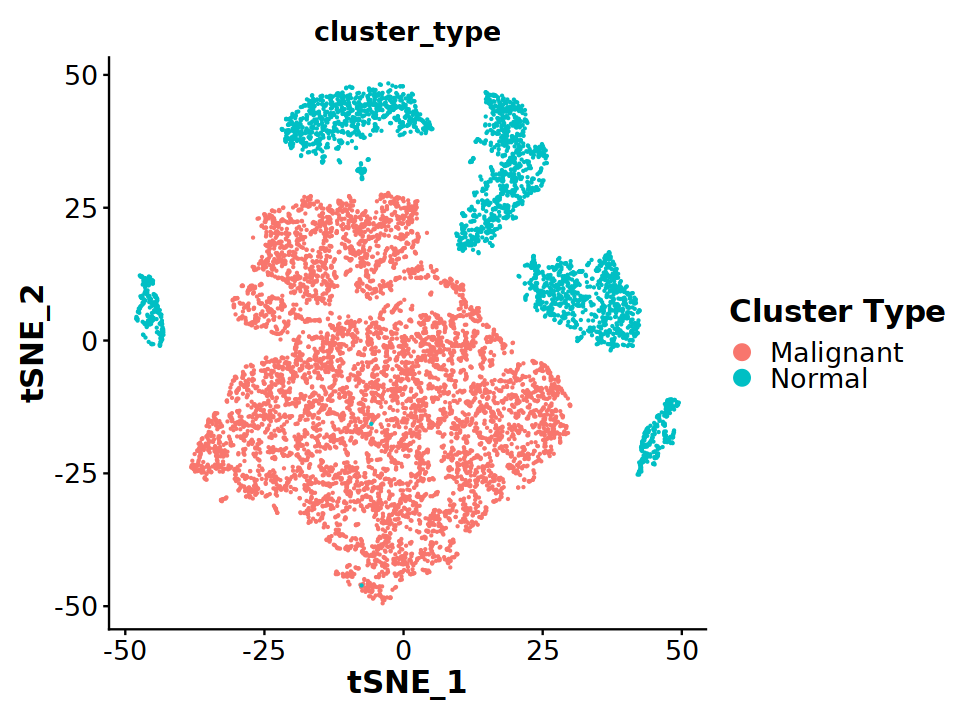

In [20]:
legend_title = "Cluster Type"
options(repr.plot.width = 8, repr.plot.height =6)
TSNEPlot(sn, label.size = 18, group.by="cluster_type") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

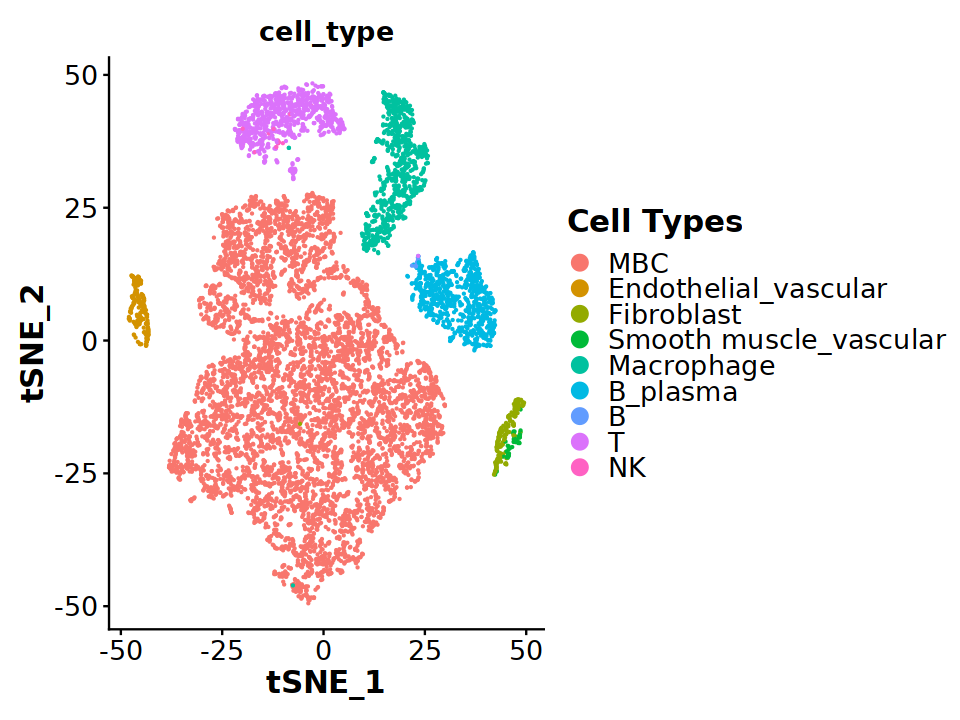

In [11]:
legend_title = "Cell Types"
options(repr.plot.width = 8, repr.plot.height =6)
TSNEPlot(sn, label.size = 18, group.by="cell_type") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

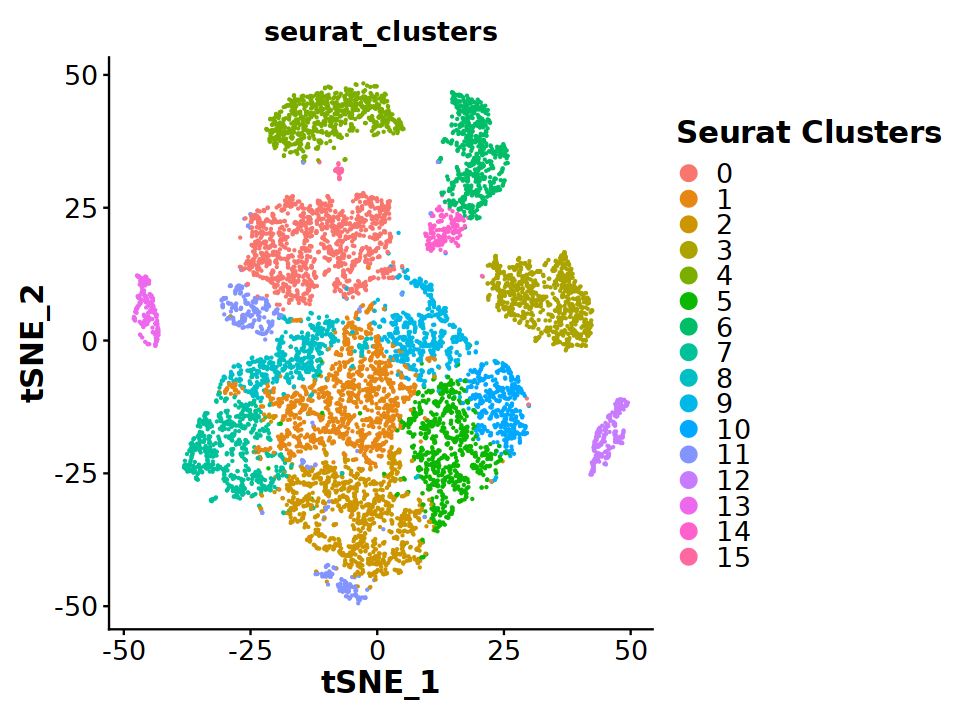

In [22]:
legend_title = "Seurat Clusters"
TSNEPlot(sn, label.size = 18, group.by="seurat_clusters") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

#### Cell Type Markers

In [12]:
sn <- SetIdent(sn,value = sn@meta.data$cell_type)
markers <- FindAllMarkers(sn,max.cells.per.ident = 500,random.seed = 1234)

Calculating cluster MBC

Calculating cluster Endothelial_vascular

Calculating cluster Fibroblast

Calculating cluster Smooth muscle_vascular

Calculating cluster Macrophage

Calculating cluster B_plasma

Calculating cluster B

Calculating cluster T

Calculating cluster NK



In [13]:
markers <- markers %>% as.data.table()

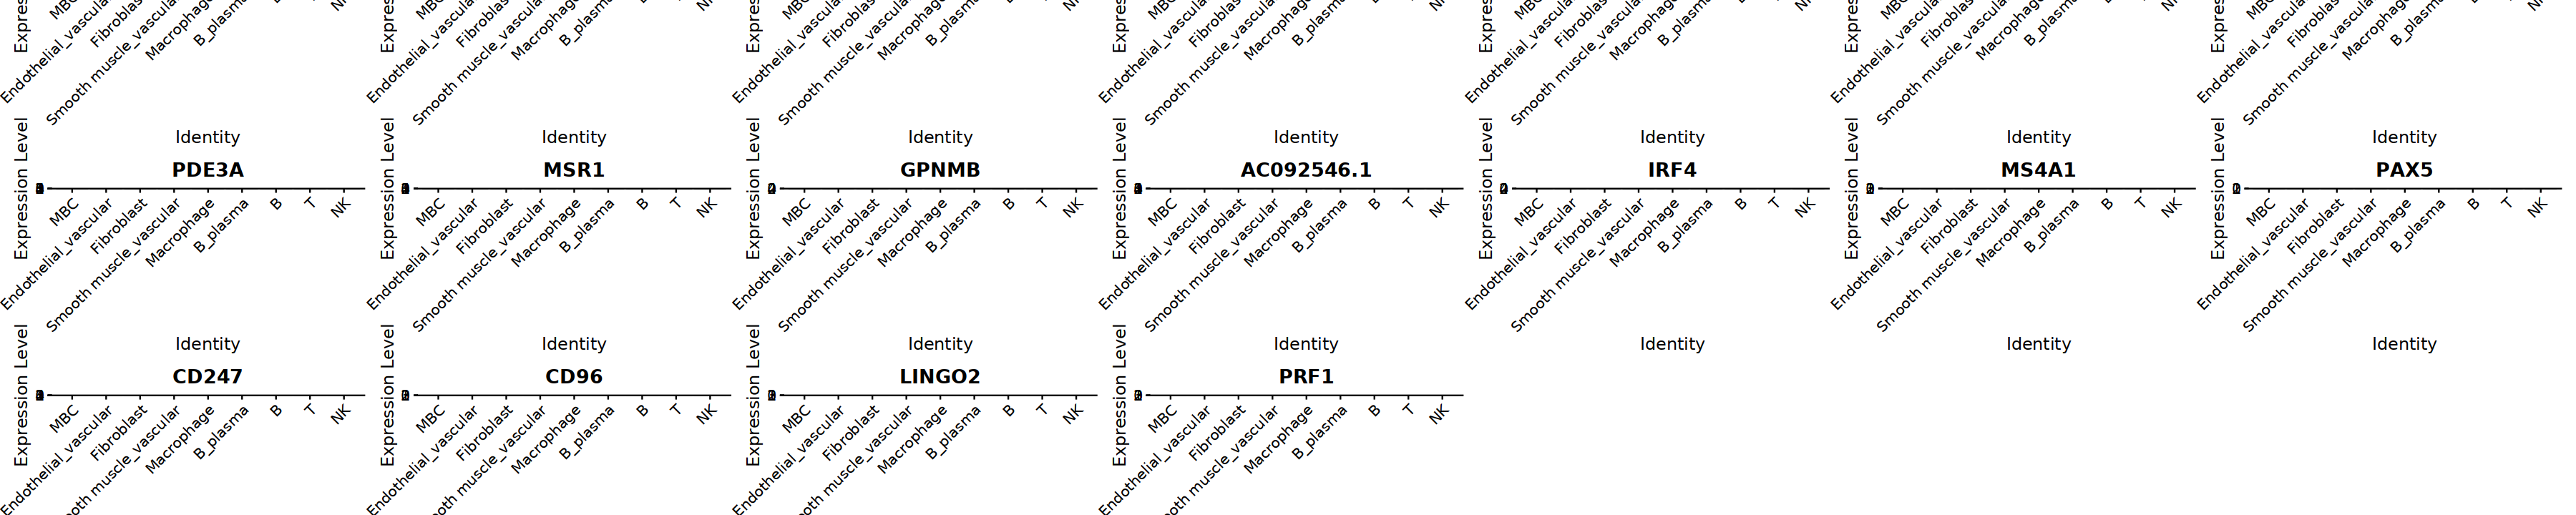

In [14]:
options(repr.plot.width = 30, repr.plot.height =6)
VlnPlot(sn,features = markers[pct.2<0.04,.SD[1:2],by="cluster"]$gene,group.by = "cell_type",ncol = 7,pt.size = 0)

In [15]:
save(markers, file="path/to/results/markers.Robj")

In [16]:
head(markers)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.205819e-183,3.315140,0.988,0.021,8.150473e-179,MBC,PRLR
4.554283e-183,6.129776,0.995,0.039,1.157881e-178,MBC,AFF3
2.235159e-181,4.055812,0.983,0.016,5.682669e-177,MBC,ANKS1B
4.289059e-180,4.341707,0.980,0.016,1.090450e-175,MBC,ANKRD30A
3.479754e-179,3.563797,0.999,0.076,8.846926e-175,MBC,KRT19
8.201916e-179,2.772970,0.969,0.016,2.085255e-174,MBC,ADCY1


#### Seurat Cluster Markers

In [31]:
sn=SetIdent(sn,value = sn@meta.data$seurat_clusters)
seurat_markers=FindAllMarkers(sn)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15



In [32]:
seurat_markers=as.data.table(seurat_markers)

In [33]:
save(seurat_markers, file="path/to/results/seurat_markers.Robj")

In [34]:
load(file="path/to/results/seurat_markers.Robj")

In [35]:
seurat_markers[order(avg_log2FC,decreasing=TRUE),.SD[1:2,],by="cluster"]

cluster,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,0.000000e+00,6.6573121,0.981,0.165,0.000000e+00,IGKC
3,0.000000e+00,6.3004981,0.980,0.250,0.000000e+00,IGHG3
13,1.718310e-209,5.8524866,0.987,0.298,4.368631e-205,INSR
13,0.000000e+00,4.6467082,0.952,0.093,0.000000e+00,ADAMTS6
12,0.000000e+00,5.4728497,0.992,0.063,0.000000e+00,CALD1
12,0.000000e+00,5.0242440,0.924,0.012,0.000000e+00,COL6A3
6,0.000000e+00,4.5723878,0.998,0.133,0.000000e+00,PLXDC2
6,0.000000e+00,4.4224244,0.998,0.296,0.000000e+00,FMNL2
4,0.000000e+00,4.1565708,0.913,0.049,0.000000e+00,TOX


In [36]:
# Get gene ontology terms associated with each cluster

In [37]:
en_seurat=seurat_markers[order(avg_log2FC,decreasing=TRUE),run_enrichr(gene,50),by="cluster"]

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

In [38]:
en_seurat[GO_Biological_Process_2018.Adjusted.P.value<0.05][order(GO_Biological_Process_2018.Adjusted.P.value),.SD[1:3],by="cluster"]

cluster,GO_Biological_Process_2018.Term,GO_Biological_Process_2018.Overlap,GO_Biological_Process_2018.P.value,GO_Biological_Process_2018.Adjusted.P.value,GO_Biological_Process_2018.Old.P.value,GO_Biological_Process_2018.Old.Adjusted.P.value,GO_Biological_Process_2018.Odds.Ratio,GO_Biological_Process_2018.Combined.Score,GO_Biological_Process_2018.Genes
<fct>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
3,B cell receptor signaling pathway (GO:0050853),11/104,1.377497e-15,6.377809e-13,0,0,60.22250,2060.724,IGHG3;IGHM;IGHG4;IGLL5;IGHG1;MEF2C;IGKC;IGLC3;PLCG2;CD38;IGLC2
3,positive regulation of B cell activation (GO:0050871),10/119,3.180724e-13,7.363377e-11,0,0,45.50688,1309.529,IGHG3;IGHM;IGHG4;IGLL5;IGHG1;MEF2C;IGKC;IGLC3;CD38;IGLC2
3,regulation of B cell activation (GO:0050864),9/95,1.782206e-12,2.750537e-10,0,0,50.70221,1371.656,IGHG3;IGHM;IGHG4;IGLL5;IGHG1;IGKC;IGLC3;MZB1;IGLC2
13,B cell receptor signaling pathway (GO:0050853),11/104,1.377497e-15,6.377809e-13,0,0,60.22250,2060.724,IGHG3;IGHM;IGHG4;IGLL5;IGHG1;MEF2C;IGKC;IGLC3;PLCG2;CD38;IGLC2
13,positive regulation of B cell activation (GO:0050871),10/119,3.180724e-13,7.363377e-11,0,0,45.50688,1309.529,IGHG3;IGHM;IGHG4;IGLL5;IGHG1;MEF2C;IGKC;IGLC3;CD38;IGLC2
13,regulation of B cell activation (GO:0050864),9/95,1.782206e-12,2.750537e-10,0,0,50.70221,1371.656,IGHG3;IGHM;IGHG4;IGLL5;IGHG1;IGKC;IGLC3;MZB1;IGLC2
12,B cell receptor signaling pathway (GO:0050853),11/104,1.377497e-15,6.377809e-13,0,0,60.22250,2060.724,IGHG3;IGHM;IGHG4;IGLL5;IGHG1;MEF2C;IGKC;IGLC3;PLCG2;CD38;IGLC2
12,positive regulation of B cell activation (GO:0050871),10/119,3.180724e-13,7.363377e-11,0,0,45.50688,1309.529,IGHG3;IGHM;IGHG4;IGLL5;IGHG1;MEF2C;IGKC;IGLC3;CD38;IGLC2
12,regulation of B cell activation (GO:0050864),9/95,1.782206e-12,2.750537e-10,0,0,50.70221,1371.656,IGHG3;IGHM;IGHG4;IGLL5;IGHG1;IGKC;IGLC3;MZB1;IGLC2


### Run SlideCNA

In [39]:
library(SlideCNA)

In [40]:
load("path/to/data/gene_pos.Robj")
load(file="path/to/results/sn.Robj")
load(file="path/to/results/md.Robj")

In [41]:
OUTPUT_DIRECTORY <- "path/to/results/SlideCNA"
plotDir <- "path/to/results/SlideCNA/plots"
dir.create(OUTPUT_DIRECTORY)
dir.create(plotDir)

In [ ]:
run_slide_cna(sn, 
              md, 
              gene_pos,
              plotDir,
              OUTPUT_DIRECTORY,
              spatial=FALSE)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.4 GiB"
